In [1]:
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn

In [2]:
df = pd.read_csv("../data/META_historical_data.csv")

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [5]:
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df['SMA50'] = df['Close'].rolling(window=50).mean()

In [6]:
df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

In [7]:
df["MACD"], df["MACD_signal"], _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

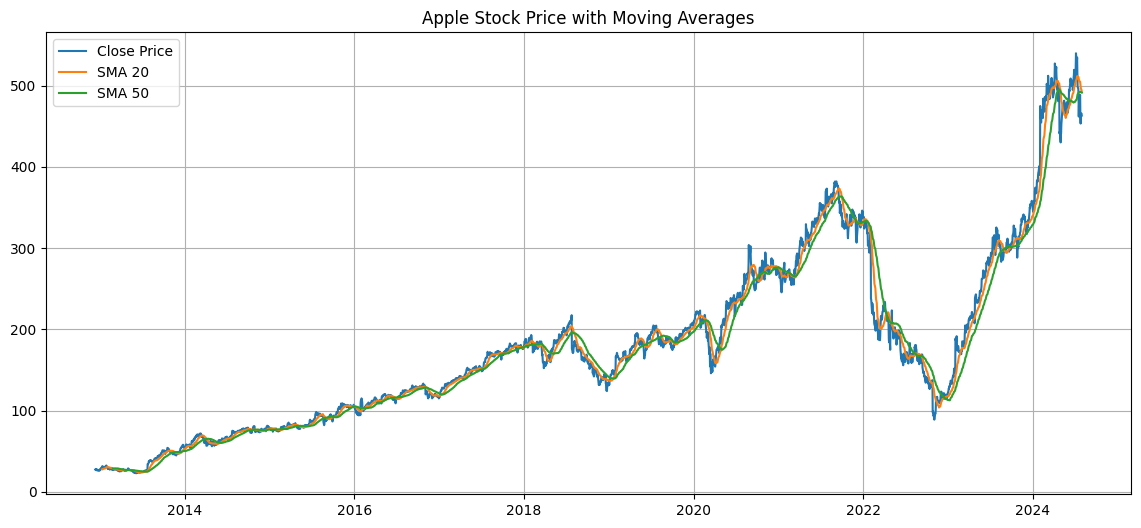

In [8]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA20'], label='SMA 20')
plt.plot(df['SMA50'], label='SMA 50')
plt.legend()
plt.title("Apple Stock Price with Moving Averages")
plt.grid(True)
plt.show()

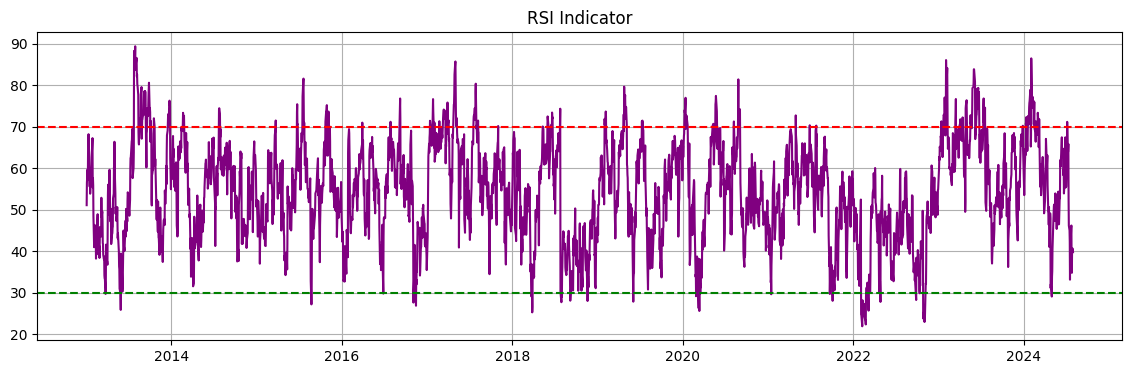

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("RSI Indicator")
plt.grid(True)
plt.show()

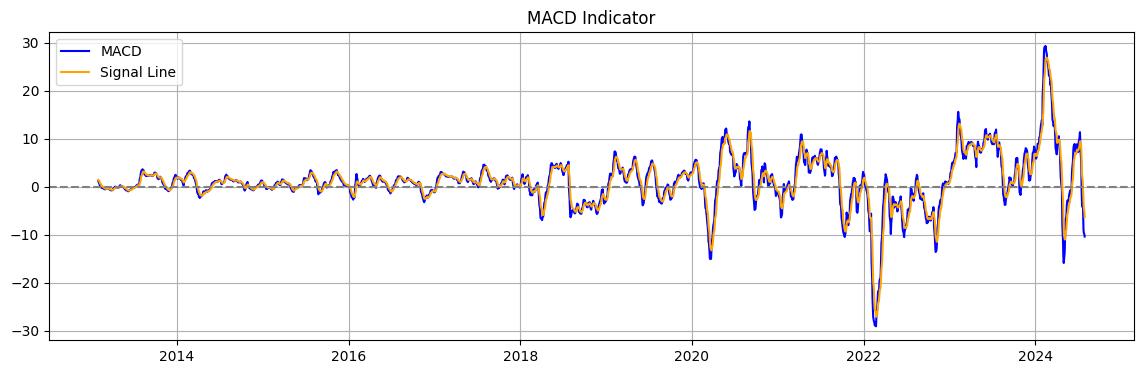

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.title("MACD Indicator")
plt.grid(True)
plt.show()

In [11]:
import os
os.makedirs("data/technical", exist_ok=True)
df.to_csv("data/technical/META_technical.csv", index=False)